In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#загрузка набора данных из 1 сессии
df=pd.read_csv('result_data.csv')


## 2.1 Разбиение набора данных

Разобъём набор данных таким образом, как это рекомендовано согласно документации `Sklearn`. А именно `30 на 70`. Поскольку данных у нас достаточное количество поэтому мы их можем поделить таким образом без риска потери данных.


Как представленно в описании, такая выборка является оптимальной, поскольку абсолютное большинство данных должно находится при обучении модели, чтобы получить наиболее оптимизированную модель со стороны её точности

### Стратификация
При разделении стратифицируем данные, чтобы получить одинаковую в процентом соотношении выборку, чтобы не было перевеса на какой-то один класс и такая ситуация не повлияла на некорректное обучение модели

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,mean_new_cases,mean_new_deaths,Rt,month
0,ARG,South America,Argentina,2022-05-15,9135308.0,33989.0,4855.571,128776.0,47.0,6.714,...,76.67,0.845,0.0,0.0,0.0,0.0,10514.08362,147.565865,1.279443,5
1,ARG,South America,Argentina,2022-05-16,9135308.0,0.0,4855.571,128776.0,0.0,6.714,...,76.67,0.845,0.0,0.0,0.0,0.0,10514.08362,147.565865,1.279443,5
2,ARG,South America,Argentina,2022-05-17,9135308.0,0.0,4855.571,128776.0,0.0,6.714,...,76.67,0.845,0.0,0.0,0.0,0.0,10514.08362,147.565865,1.279443,5
3,ARG,South America,Argentina,2022-05-18,9135308.0,0.0,4855.571,128776.0,0.0,6.714,...,76.67,0.845,0.0,0.0,0.0,0.0,10514.08362,147.565865,1.279443,5
4,ARG,South America,Argentina,2022-05-19,9135308.0,0.0,4855.571,128776.0,0.0,6.714,...,76.67,0.845,0.0,0.0,0.0,0.0,10514.08362,147.565865,1.279443,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188554,PCN,Oceania,Pitcairn,2021-06-16,0.0,0.0,0.000,0.0,0.0,0.000,...,0.00,0.000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,6
188555,PCN,Oceania,Pitcairn,2021-06-17,0.0,0.0,0.000,0.0,0.0,0.000,...,0.00,0.000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,6
188556,PCN,Oceania,Pitcairn,2021-06-18,0.0,0.0,0.000,0.0,0.0,0.000,...,0.00,0.000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,6
188557,PCN,Oceania,Pitcairn,2021-06-19,0.0,0.0,0.000,0.0,0.0,0.000,...,0.00,0.000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,6


In [4]:
#замена NaN на числа
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [5]:
#отбрасываем строки, где значение Rt больше 5 
df=df[df['Rt']<5].reset_index(drop=True)

### Определение переменной опасности

In [6]:
#Присвоение группа опасности 1
df1=df[df['Rt']<=0.6]
df1['Danger']=1

<ipython-input-6-3b437f3b700a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Danger']=1


In [7]:
#Присвоение группа опасности 2
df2=df[(df['Rt']>0.6) & (df['Rt']<=0.9)]
df2['Danger']=2

<ipython-input-7-27d0682b320e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Danger']=2


In [8]:
#Присвоение группа опасности 3
df3=df[df['Rt']>0.9]
df3['Danger']=3

<ipython-input-8-91dcf782407d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Danger']=3


In [9]:
#объединение групп опасности с основынм набором данных
df=pd.concat([df1, df2, df3]).reset_index(drop=True)

In [10]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,mean_new_cases,mean_new_deaths,Rt,month,Danger
0,ARG,South America,Argentina,2022-05-07,9083673.0,0.0,1634.714,128653.0,0.0,15.857,...,0.845,0.0,0.0,0.0,0.0,10514.083620,147.565865,0.0,5,1
1,ARG,South America,Argentina,2022-05-08,9101319.0,17646.0,2520.857,128729.0,76.0,10.857,...,0.845,0.0,0.0,0.0,0.0,10514.083620,147.565865,0.0,5,1
2,ARG,South America,Argentina,2022-05-09,9101319.0,0.0,2520.857,128729.0,0.0,10.857,...,0.845,0.0,0.0,0.0,0.0,10514.083620,147.565865,0.0,5,1
3,ARG,South America,Argentina,2022-05-10,9101319.0,0.0,2520.857,128729.0,0.0,10.857,...,0.845,0.0,0.0,0.0,0.0,10514.083620,147.565865,0.0,5,1
4,ARG,South America,Argentina,2022-05-11,9101319.0,0.0,2520.857,128729.0,0.0,10.857,...,0.845,0.0,0.0,0.0,0.0,10514.083620,147.565865,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178620,PLW,Oceania,Palau,2022-01-04,13.0,0.0,0.429,0.0,0.0,0.000,...,0.826,0.0,0.0,0.0,0.0,18.127737,0.021898,1.0,1,3
178621,PLW,Oceania,Palau,2022-01-05,15.0,2.0,0.714,0.0,0.0,0.000,...,0.826,0.0,0.0,0.0,0.0,18.127737,0.021898,1.0,1,3
178622,PLW,Oceania,Palau,2022-01-06,16.0,1.0,0.857,0.0,0.0,0.000,...,0.826,0.0,0.0,0.0,0.0,18.127737,0.021898,1.0,1,3
178623,PLW,Oceania,Palau,2021-08-22,1.0,1.0,0.000,0.0,0.0,0.000,...,0.826,0.0,0.0,0.0,0.0,18.127737,0.021898,1.0,8,3


Был добавлен дополнительный атрибут Danger, который означает уровень опасности эпидемиологической ситуации в стране

### Визуализация

Для анализа данных с помощью визуализации были выбраны слующие способы: гистограмма и линейный график. Эти способы были выбраны, так как в этой задаче они способны наиболее наглядно отрпзить зависимость целевой переменной от атрибутов

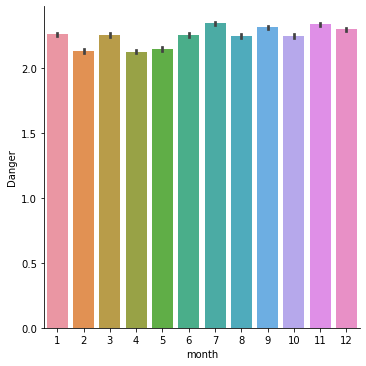

In [11]:
sns.catplot(x="month", y="Danger", kind="bar", data=df)

<AxesSubplot:xlabel='mean_new_cases', ylabel='Danger'>

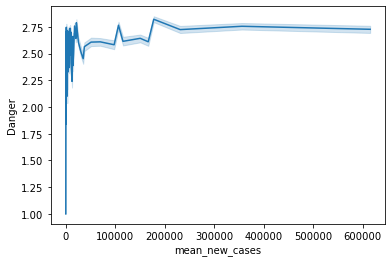

In [14]:
sns.lineplot(x='mean_new_cases', y='Danger',data=df)

<AxesSubplot:xlabel='mean_new_deaths', ylabel='Danger'>

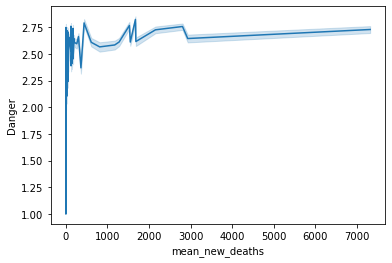

In [15]:
sns.lineplot(x='mean_new_deaths',y='Danger',data=df)

### Разбиение набора на обчающиую и тестовую выборки

In [16]:
X=df[['new_cases', 'new_deaths', 'Rt']]
y=df['Danger']

In [17]:
#Получение выборок
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## 2.3 Классификация 

Рассмотрим три модели классификации
### KNeighborsClassifier
Классификация на основе соседей - это тип обучения на основе экземпляров или необобщающего обучения: он не пытается построить общую внутреннюю модель, а просто сохраняет экземпляры обучающих данных. Классификация вычисляется простым большинством голосов ближайших соседей каждой точки: точке запроса назначается класс данных, который имеет наибольшее количество представителей среди ближайших соседей точки.

### RandomForestClassifier
Случайный лес — это метаоценка, которая соответствует ряду классификаторов дерева решений для различных подвыборок набора данных и использует усреднение для повышения точности прогнозирования и контроля переобучения. Размер подвыборки управляется параметром max_samples, если bootstrap=True (по умолчанию), в противном случае для построения каждого дерева используется весь набор данных
### GaussianNB
Наи́вный ба́йесовский классифика́тор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости. В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно

## Метрики
Рассмотрим две метрикики для оценивания модели классификации

### accuracy f1-score
Это гармоническое среднее значений точности и полноты. Возьмём её, потому что она дает лучшую оценку неправильно классифицированных случаев

### macro avg f1-score

macro avg f1-score пожалуй, самый простой из многочисленных методов усреднения. Макроусредненная оценка F1 (или макрооценка F1) вычисляется путем взятия среднего арифметического (также известного как невзвешенное среднее) всех оценок F1 для каждого класса. Этот метод будет взят, поскольку он обрабатывает все классы одинаково, независимо от их значений поддержки

## 2.4 Обучение

In [18]:
#Импорт моделей
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
#Обучение
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
preds=neigh.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89     16122
           2       0.57      0.65      0.60     11145
           3       0.86      0.82      0.84     31680

    accuracy                           0.81     58947
   macro avg       0.77      0.79      0.78     58947
weighted avg       0.81      0.81      0.81     58947



In [20]:
#Обучение
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_preds=rfc.predict(X_test)
print(classification_report(rfc_preds, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     16094
           2       1.00      1.00      1.00     12737
           3       1.00      1.00      1.00     30116

    accuracy                           1.00     58947
   macro avg       1.00      1.00      1.00     58947
weighted avg       1.00      1.00      1.00     58947



In [21]:
#Обучение
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_preds=gnb.predict(X_test)
print(classification_report(gnb_preds, y_test))

              precision    recall  f1-score   support

           1       0.99      0.29      0.45     54591
           2       0.02      0.32      0.05       988
           3       0.08      0.68      0.14      3368

    accuracy                           0.31     58947
   macro avg       0.36      0.43      0.21     58947
weighted avg       0.92      0.31      0.43     58947



### Вывод
Наиболее оптимальной моделью будет `KNeighborsClassifier` c accuracy f1-score = `0.78` и macro avg f1-score = `0.74`, поскольку по сравнению с другими он показал наилучший результат. `RandomForestClassifier` не будет взят, поскольку у него явное переобучение

## Отчёт
* 2.1 Разбиение набора данных - набор данныхз разбит на обучаюшую и тестовую выборки
* 2.3 Классификация - выбраны 3 алгоритма классификации
* 2.4 Обучение - произведена классификация по уровню опасности

In [22]:
# Сохранение данных
df.to_csv('result_data.csv', encoding='utf-8-sig', index=False)